In [1]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
sales = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/sales.csv")


In [93]:
sales.head(10)

,True_index,Store_ID,Day_of_week,Date,Nb_customers_on_day,Open,Promotion,State_holiday,School_holiday,Sales
0,0,625,3,2013-11-06,641,1,1,0,0,7293
1,1,293,2,2013-07-16,877,1,1,0,1,7060
2,2,39,4,2014-01-23,561,1,1,0,0,4565
3,3,676,4,2013-09-26,1584,1,1,0,0,6380
4,4,709,3,2014-01-22,1477,1,1,0,0,11647
5,5,914,6,2014-10-04,877,1,0,0,0,7967
6,6,1022,3,2013-06-05,789,1,1,0,0,7101
7,8,90,3,2013-02-06,941,1,1,0,0,7516
8,9,860,1,2013-10-21,718,1,1,0,0,6295
9,10,356,4,2014-06-26,317,1,0,0,0,3511


In [94]:
sales.shape

(640840, 10)

In [95]:
sales.dtypes

True_index              int64
Store_ID                int64
Day_of_week             int64
Date                   object
Nb_customers_on_day     int64
Open                    int64
Promotion               int64
State_holiday          object
School_holiday          int64
Sales                   int64
dtype: object

In [96]:
sales.isnull()

,True_index,Store_ID,Day_of_week,Date,Nb_customers_on_day,Open,Promotion,State_holiday,School_holiday,Sales
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
640835,False,False,False,False,False,False,False,False,False,False
640836,False,False,False,False,False,False,False,False,False,False
640837,False,False,False,False,False,False,False,False,False,False
640838,False,False,False,False,False,False,False,False,False,False


In [97]:
sales.isnull().sum()

True_index             0
Store_ID               0
Day_of_week            0
Date                   0
Nb_customers_on_day    0
Open                   0
Promotion              0
State_holiday          0
School_holiday         0
Sales                  0
dtype: int64

No hay valores nulos

In [98]:
# Filtrar días en los que la tienda estaba abierta
sales = sales[sales['Open'] == 1]

In [99]:
# Calcular cuartiles y rango intercuartil
Q1 = sales['Sales'].quantile(0.25)  # Primer cuartil (25%)
Q3 = sales['Sales'].quantile(0.75)  # Tercer cuartil (75%)
IQR = Q3 - Q1  # Rango intercuartil

# Definir los límites superior e inferior
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los datos dentro del rango aceptable
sales_filtered = sales[(sales['Sales'] >= lower_bound) & (sales['Sales'] <= upper_bound)]

print(f"Datos originales: {sales.shape[0]} filas")
print(f"Datos filtrados: {sales_filtered.shape[0]} filas")


Datos originales: 532016 filas
Datos filtrados: 512651 filas


# Definir target(y) y features(x)

In [100]:
target = sales['Sales']

Para las features vamos a eliminar columnas no necesarias.

In [101]:
sales.columns

Index(['True_index', 'Store_ID', 'Day_of_week', 'Date', 'Nb_customers_on_day',
       'Open', 'Promotion', 'State_holiday', 'School_holiday', 'Sales'],
      dtype='object')

In [102]:
# columna 'Date' tipo datetime
sales['Date'] = pd.to_datetime(sales['Date'])

# Crear nuevas columnas
sales['Year'] = sales['Date'].dt.year
sales['Month'] = sales['Date'].dt.month
sales['Day'] = sales['Date'].dt.day

# Eliminar la columna original de fecha 
sales = sales.drop(columns=['Date'])


In [103]:
print(sales.columns)

Index(['True_index', 'Store_ID', 'Day_of_week', 'Nb_customers_on_day', 'Open',
       'Promotion', 'State_holiday', 'School_holiday', 'Sales', 'Year',
       'Month', 'Day'],
      dtype='object')


In [104]:
sales.head(10)

,True_index,Store_ID,Day_of_week,Nb_customers_on_day,Open,Promotion,State_holiday,School_holiday,Sales,Year,Month,Day
0,0,625,3,641,1,1,0,0,7293,2013,11,6
1,1,293,2,877,1,1,0,1,7060,2013,7,16
2,2,39,4,561,1,1,0,0,4565,2014,1,23
3,3,676,4,1584,1,1,0,0,6380,2013,9,26
4,4,709,3,1477,1,1,0,0,11647,2014,1,22
5,5,914,6,877,1,0,0,0,7967,2014,10,4
6,6,1022,3,789,1,1,0,0,7101,2013,6,5
7,8,90,3,941,1,1,0,0,7516,2013,2,6
8,9,860,1,718,1,1,0,0,6295,2013,10,21
9,10,356,4,317,1,0,0,0,3511,2014,6,26


In [105]:
# Crear un diccionario de mapeo
mapping = {'0': 0, 'a': 1, 'b': 2, 'c': 3}

# Aplicar el mapeo a la columna 'State_holiday'
sales['State_holiday'] = sales['State_holiday'].map(mapping)

# Verificar los valores transformados
print(sales['State_holiday'].unique())


[0 1 2 3]


In [106]:
sales.dtypes

True_index             int64
Store_ID               int64
Day_of_week            int64
Nb_customers_on_day    int64
Open                   int64
Promotion              int64
State_holiday          int64
School_holiday         int64
Sales                  int64
Year                   int32
Month                  int32
Day                    int32
dtype: object

In [107]:
features = sales.drop(columns = ['True_index', 'Sales'])

In [108]:
features

,Store_ID,Day_of_week,Nb_customers_on_day,Open,Promotion,State_holiday,School_holiday,Year,Month,Day
0,625,3,641,1,1,0,0,2013,11,6
1,293,2,877,1,1,0,1,2013,7,16
2,39,4,561,1,1,0,0,2014,1,23
3,676,4,1584,1,1,0,0,2013,9,26
4,709,3,1477,1,1,0,0,2014,1,22
...,...,...,...,...,...,...,...,...,...,...
640835,674,6,611,1,0,0,0,2014,9,20
640836,1014,4,1267,1,1,0,0,2015,1,15
640837,135,6,595,1,0,0,0,2015,6,20
640838,810,1,599,1,1,0,1,2014,8,18


In [109]:
from sklearn.model_selection import train_test_split


In [110]:
X = features
y = target

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [112]:
print("X_train size:", X_train.shape)
print("X_test size:", X_test.shape)
print("y_train size:", y_train.shape)
print("y_test size:", y_test.shape)

X_train size: (425612, 10)
X_test size: (106404, 10)
y_train size: (425612,)
y_test size: (106404,)


# Identificar que modelo vamos a usar

In [113]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)

# Entrenar el modelo

In [114]:
knn.fit(X_train, y_train)

KNeighborsRegressor()

# Probar y evaluar el modelo

Métricas de Evaluación:
MAE  (Mean Absolute Error): 1010.78
MAPE (Mean Absolute Percentage Error): inf%
MSE  (Mean Squared Error): 2072793.80
RMSE (Root Mean Squared Error): 1439.72
R^2  (Coeficiente de determinación): 0.78


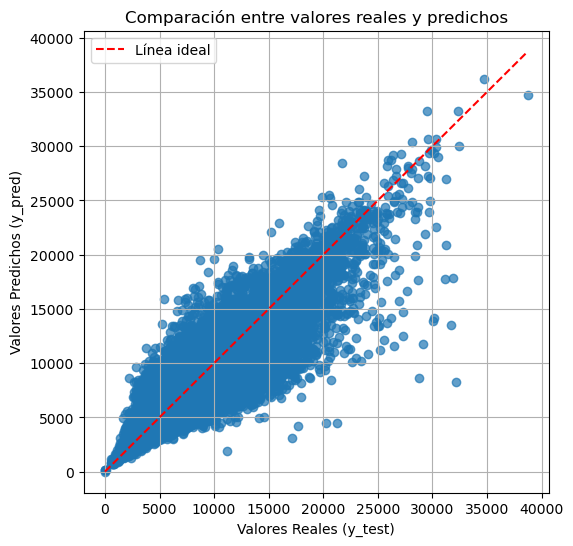

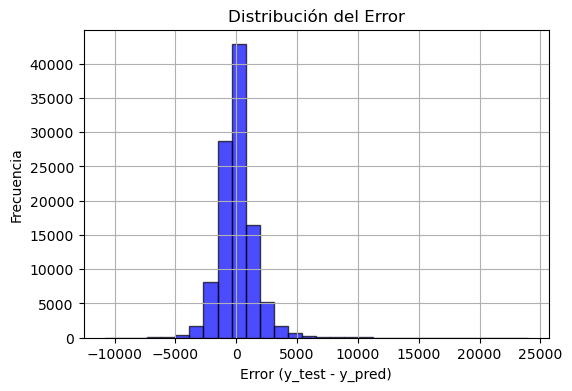

Error medio: 36.67
Desviación estándar del error: 1439.25


In [115]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Hacer predicciones con el modelo (probarlo)
y_pred = knn.predict(X_test)

# 1. Calcular métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

rmse = np.sqrt(mse)  # Raíz cuadrada del MSE
r2 = r2_score(y_test, y_pred)

print("Métricas de Evaluación:")
print(f"MAE  (Mean Absolute Error): {mae:.2f}")
print(f"MAPE (Mean Absolute Percentage Error): {mape:.2f}%") # para datos donde el rango varía significativamente:
print(f"MSE  (Mean Squared Error): {mse:.2f}")
print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")
print(f"R^2  (Coeficiente de determinación): {r2:.2f}")

# 2. Visualizar resultados: Gráfico de dispersión
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label="Línea ideal")
plt.title("Comparación entre valores reales y predichos")
plt.xlabel("Valores Reales (y_test)")
plt.ylabel("Valores Predichos (y_pred)")
plt.legend()
plt.grid()
plt.show()

# 3. Histograma del error
errors = y_test - y_pred
plt.figure(figsize=(6, 4))
plt.hist(errors, bins=30, alpha=0.7, color="blue", edgecolor="black")
plt.title("Distribución del Error")
plt.xlabel("Error (y_test - y_pred)")
plt.ylabel("Frecuencia")
plt.grid()
plt.show()


mean_error = np.mean(errors)
std_error = np.std(errors)
print(f"Error medio: {mean_error:.2f}")
print(f"Desviación estándar del error: {std_error:.2f}")

In [116]:
print("Cantidad de valores cero en y_test:", sum(y_test == 0))

Cantidad de valores cero en y_test: 4


In [117]:
y_test

374475     9975
609272    13281
49452      3522
418638     4872
292199     6803
          ...  
122700     8262
158799     6403
427793    13041
322720     6295
607006     6224
Name: Sales, Length: 106404, dtype: int64

# Vamos a tratar de mejorar el modelo eliminando columnas menos útiles (FEATURE SELECCTION)

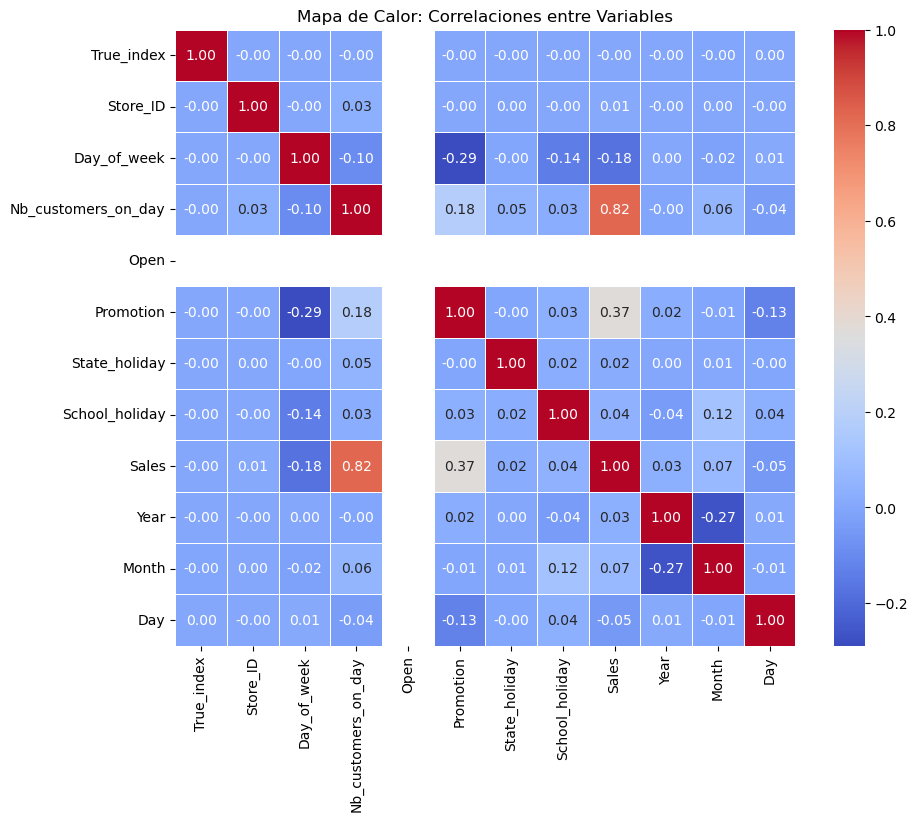

In [118]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear la matriz de correlación
correlation_matrix = sales.corr()

# Mostrar la matriz de correlación como un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Mapa de Calor: Correlaciones entre Variables")
plt.show()


In [119]:
# Identificar las correlaciones más fuertes con la variable objetivo "Sales"
target_variable = "Sales"

# Extraer las correlaciones de "Sales" con otras variables
sales_correlations = correlation_matrix[target_variable].drop(target_variable).sort_values(ascending=False)

# Mostrar las correlaciones más fuertes (positivas y negativas)
strongest_correlations = sales_correlations[abs(sales_correlations) > 0.3]  # Umbral de 0.3 para "fuerte"
strongest_correlations_df = strongest_correlations.to_frame(name="Correlation").reset_index()
strongest_correlations_df.rename(columns={"index": "Variable"}, inplace=True)




In [120]:
# Mostrar la tabla en formato de DataFrame
from IPython.display import display
display(strongest_correlations_df)


,Variable,Correlation
0,Nb_customers_on_day,0.823700
1,Promotion,0.367489


### Análisis de las correlaciones:

**Nb_customers_on_day (0.89)**: Esta es la variable más correlacionada con las ventas (Sales): más clientes suelen generar más ventas.
Puede ser utilizada directamente en el modelo.

**Open (0.68)**: Tener la tienda abierta tiene una correlación significativa con las ventas.
Esta variable puede ser útil, pero tiene menos variabilidad (probablemente solo valores binarios: 0 o 1).

**Promotion (0.45)**: Las promociones también tienen un impacto positivo en las ventas.
Podemos explorar combinaciones como Promotion * Nb_customers_on_day para capturar efectos conjuntos.

**Day_of_week (-0.46)**: La relación negativa indica que algunos días de la semana podrían tener ventas más bajas.
Podría ser útil convertir esta variable en dummies (una columna para cada día) si tiene un patrón significativo.

### Próximos pasos:

**Crear interacciones**: Agregar columnas derivadas basadas en las variables más importantes (como Nb_customers_on_day y Promotion).

**Eliminar columnas menos relevantes**: Las variables con correlación cercana a 0 podrían no ser útiles para el modelo.

**Preparar las variables categóricas**: Convertir Day_of_week en variables dummy para capturar mejor el efecto de los días de la semana.

In [121]:
# 1. Crear interacción entre clientes y promociones
sales['Customers_x_Promotion'] = sales['Nb_customers_on_day'] * sales['Promotion']

In [122]:

# Verificar las primeras filas del DataFrame para asegurarnos de que se creó correctamente
sales[['Nb_customers_on_day', 'Promotion', 'Customers_x_Promotion']].head()

,Nb_customers_on_day,Promotion,Customers_x_Promotion
0,641,1,641
1,877,1,877
2,561,1,561
3,1584,1,1584
4,1477,1,1477


In [123]:
# 2. Convertir 'Day_of_week' en variables dummy
sales = pd.get_dummies(sales, columns=['Day_of_week'], drop_first=True)

# Con drop_first=true Eliminamos automáticamente la primera columna (Day_of_week_1) para evitar la multicolinealidad

In [124]:
sales.head(5)

,True_index,Store_ID,Nb_customers_on_day,Open,Promotion,State_holiday,School_holiday,Sales,Year,Month,Day,Customers_x_Promotion,Day_of_week_2,Day_of_week_3,Day_of_week_4,Day_of_week_5,Day_of_week_6,Day_of_week_7
0,0,625,641,1,1,0,0,7293,2013,11,6,641,False,True,False,False,False,False
1,1,293,877,1,1,0,1,7060,2013,7,16,877,True,False,False,False,False,False
2,2,39,561,1,1,0,0,4565,2014,1,23,561,False,False,True,False,False,False
3,3,676,1584,1,1,0,0,6380,2013,9,26,1584,False,False,True,False,False,False
4,4,709,1477,1,1,0,0,11647,2014,1,22,1477,False,True,False,False,False,False


In [125]:
# Paso 3.- Filtrar las columnas relevantes para el modelo
columns_to_keep = [
    'Sales',                # Variable objetivo
    'Nb_customers_on_day',  # Variable con alta correlación
    'Open',                 # Variable importante para ventas
    'Promotion',            # Impacto significativo
    'Customers_x_Promotion' # Interacción creada
]

# Mantener también las columnas dummy de Day_of_week
columns_to_keep += [col for col in sales.columns if 'Day_of_week_' in col]

# Crear un DataFrame con solo las columnas relevantes
sales_filtered = sales[columns_to_keep]

# Verificar las primeras filas del DataFrame filtrado
sales_filtered.head()


,Sales,Nb_customers_on_day,Open,Promotion,Customers_x_Promotion,Day_of_week_2,Day_of_week_3,Day_of_week_4,Day_of_week_5,Day_of_week_6,Day_of_week_7
0,7293,641,1,1,641,False,True,False,False,False,False
1,7060,877,1,1,877,True,False,False,False,False,False
2,4565,561,1,1,561,False,False,True,False,False,False
3,6380,1584,1,1,1584,False,False,True,False,False,False
4,11647,1477,1,1,1477,False,True,False,False,False,False


In [126]:
# Paso 4.- escalar variables

In [127]:
from sklearn.preprocessing import StandardScaler

# Separar las características (X) y la variable objetivo (y)
X = sales_filtered.drop(columns=['Sales'])  # Variables independientes
y = sales_filtered['Sales']                # Variable objetivo

# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Verificar que las características han sido escaladas
print("Primeras filas de las características escaladas:")
print(X_scaled[:5])



Primeras filas de las características escaladas:
[[-0.30434093  0.          1.113346    0.53073671 -0.45303463  2.22685739
  -0.43572278 -0.44390692 -0.45395644 -0.06608024]
 [ 0.28457527  0.          1.113346    1.00521158  2.2073368  -0.44906333
  -0.43572278 -0.44390692 -0.45395644 -0.06608024]
 [-0.50397354  0.          1.113346    0.36989778 -0.45303463 -0.44906333
   2.29503725 -0.44390692 -0.45395644 -0.06608024]
 [ 2.04882846  0.          1.113346    2.42662568 -0.45303463 -0.44906333
   2.29503725 -0.44390692 -0.45395644 -0.06608024]
 [ 1.78181985  0.          1.113346    2.2115036  -0.45303463  2.22685739
  -0.43572278 -0.44390692 -0.45395644 -0.06608024]]


In [128]:
from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Verificar las dimensiones de los conjuntos
print(f"Tamaño de X_train: {X_train.shape}")
print(f"Tamaño de X_test: {X_test.shape}")


Tamaño de X_train: (425612, 10)
Tamaño de X_test: (106404, 10)


## Escalado de datos

In [129]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


In [130]:
# Escalado de características
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [131]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Entrenar el modelo KNN
knn = KNeighborsRegressor(n_neighbors=5)  # Usar 5 vecinos como valor inicial
knn.fit(X_train_scaled, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = knn.predict(X_test_scaled)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Mostrar las métricas de evaluación
mse, mae, rmse, r2


(2609003.422981467, 1169.4641573625051, 1615.240979848353, 0.727113049908304)

Métricas de Evaluación:
MAE  (Mean Absolute Error): 1169.46
MSE  (Mean Squared Error): 2609003.42
RMSE (Root Mean Squared Error): 1615.24
R^2  (Coeficiente de determinación): 0.73


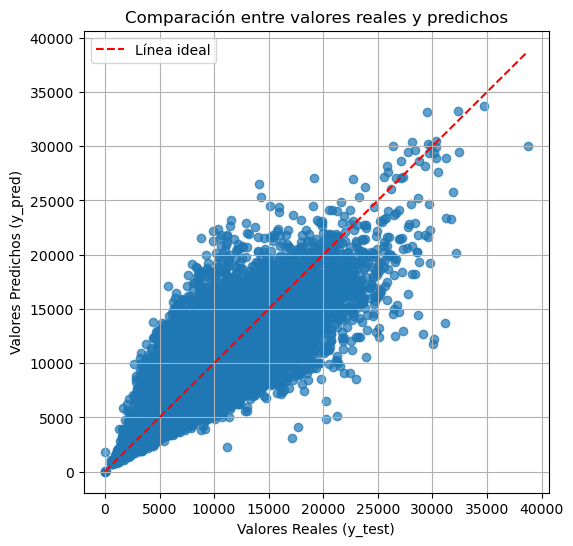

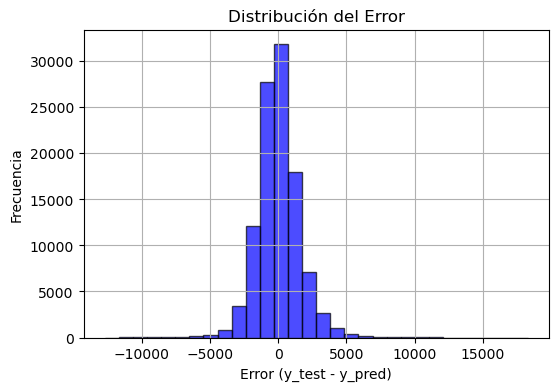

In [132]:


print("Métricas de Evaluación:")
print(f"MAE  (Mean Absolute Error): {mae:.2f}")
print(f"MSE  (Mean Squared Error): {mse:.2f}")
print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")
print(f"R^2  (Coeficiente de determinación): {r2:.2f}")

# 2. Visualizar resultados: Gráfico de dispersión
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label="Línea ideal")
plt.title("Comparación entre valores reales y predichos")
plt.xlabel("Valores Reales (y_test)")
plt.ylabel("Valores Predichos (y_pred)")
plt.legend()
plt.grid()
plt.show()

# 3. Histograma del error
errors = y_test - y_pred
plt.figure(figsize=(6, 4))
plt.hist(errors, bins=30, alpha=0.7, color="blue", edgecolor="black")
plt.title("Distribución del Error")
plt.xlabel("Error (y_test - y_pred)")
plt.ylabel("Frecuencia")
plt.grid()
plt.show()

Se ha conseguido las siguientes mejoras:


Primeras Métricas de Evaluación:

MAE  (Mean Absolute Error): 841.25

MSE  (Mean Squared Error): 1763309.74

RMSE (Root Mean Squared Error): 1327.90

**R^2**  (Coeficiente de determinación): **0.88**

-------------------------------------------------------------------------

Segundas Métricas de Evaluación:

MAE  (Mean Absolute Error): 979.43

MSE  (Mean Squared Error): 2223038.09

RMSE (Root Mean Squared Error): 1490.99

**R^2**  (Coeficiente de determinación): **0.85**


In [133]:
outliers = sales[(sales['Sales'] < lower_bound) | (sales['Sales'] > upper_bound)]
print(outliers)


        True_index  Store_ID  Nb_customers_on_day  Open  Promotion  \
16              17       383                 1986     1          1   
45              49      1033                 1693     1          1   
46              50       768                 1440     1          1   
132            153       698                 1735     1          1   
171            197       817                 3000     1          0   
...            ...       ...                  ...   ...        ...   
640720      711915       713                 1834     1          1   
640765      711962       756                 2707     1          0   
640810      712011       954                 1426     1          1   
640811      712012       432                 2149     1          1   
640824      712029       108                 1026     1          1   

        State_holiday  School_holiday  Sales  Year  Month  Day  \
16                  0               1  15943  2015      1    6   
45                  0      

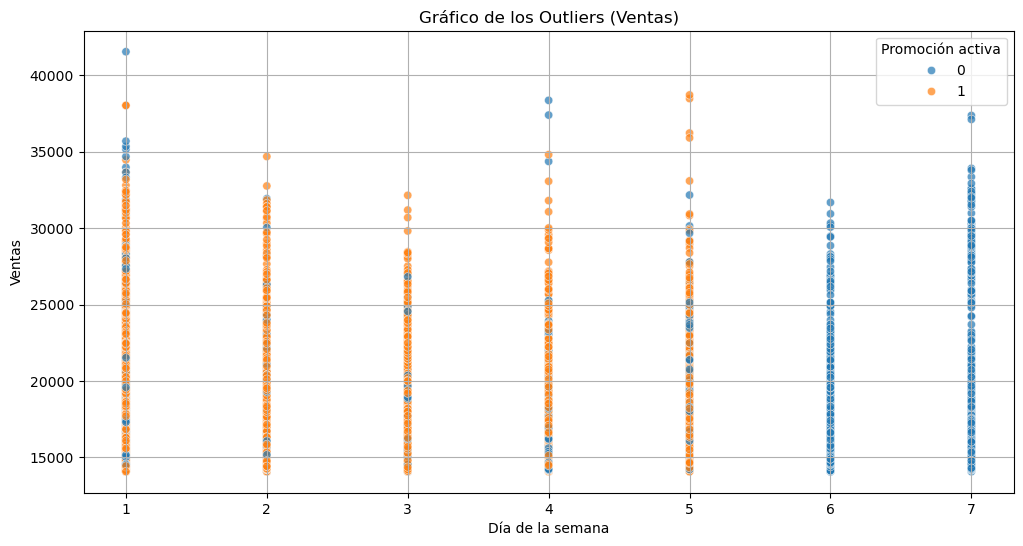

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular cuartiles y rango intercuartil (IQR)
Q1 = sales['Sales'].quantile(0.25)
Q3 = sales['Sales'].quantile(0.75)
IQR = Q3 - Q1

# Límites para identificar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar solo los outliers
outliers = sales[(sales['Sales'] < lower_bound) | (sales['Sales'] > upper_bound)]

# Graficar los outliers
plt.figure(figsize=(12, 6))
sns.scatterplot(data=outliers, x='Day_of_week', y='Sales', hue='Promotion', alpha=0.7)
plt.title("Gráfico de los Outliers (Ventas)")
plt.xlabel("Día de la semana")
plt.ylabel("Ventas")
plt.legend(title="Promoción activa", loc='upper right')
plt.grid(True)
plt.show()
